In [1]:
import pandas as pd
from sklearn.datasets import make_regression

In [83]:
x,y = make_regression(n_samples=500, n_features=1, n_targets=1,noise=20,random_state=13)

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [85]:
y_test.shape

(100,)

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [88]:
y_pred = model.predict(x_test)
y_pred

array([-28.69848878, -29.30654391,  -0.97772246, -19.9591483 ,
        -3.97450147, -15.05932115,  20.60004685, -26.31132396,
        -3.84761737,  11.99098417,  31.21342459,  16.07447763,
        18.03656763,  31.06437561, -22.06586939,  21.09921536,
       -40.13751968,  -2.37185263,  18.16556052, -35.29713531,
        47.13720133, -31.96305824,  -2.42776687, -29.00763104,
        30.59684655,  -4.40661978,  18.37610604,   4.5682805 ,
       -29.20004341,  -1.91918434,  82.54322063, -11.08665997,
       -19.05296777,  -6.42258794,  11.31109898, -43.28941007,
       -29.23361306, -29.4208566 , -32.54110456,  -5.99344079,
        -4.56751724,   1.48171893,   8.05016559,  18.58301958,
        15.38193546,  19.05017089,  -9.08089127,  -8.98133744,
         2.61952314,  16.45026181,   0.16015884, -36.88453439,
       -20.64455012, -15.68724286, -64.67660373, -28.72349754,
        -5.40762069,  -7.21701495, -21.27855276,   2.77024309,
         9.45257765, -29.18341403,  18.69907362,   0.32

In [89]:
from sklearn.metrics import r2_score

In [151]:
results = r2_score(y_test,y_pred)
results

0.5942968938353169

In [152]:
model.coef_

array([24.96580541])

In [153]:
model.intercept_

-2.368122920727285

### Creating my own model, later on we will compare results to evaluate the models

In [154]:
import numpy as np

In [155]:
class MySimpleGDR:
    def __init__(self,learning_rate=0.01,epochs=50):
        self.m = 400
        self.b = 100
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self,x_train,y_train):
        for i in range(self.epochs):
            
            slope_of_b = -2*np.sum(y_train - self.m*x_train.ravel() - self.b)
            slope_of_m = -2*np.sum((y_train - self.m*x_train.ravel() - self.b)*x_train.ravel())
#             loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr*slope_of_b)
            self.m = self.m - (self.lr*slope_of_m)
            
#             print(self.m)
        print('b is',self.b)
        print('m is',self.m)
        
    def predict(self,x_test):
        pred = (self.m*x_test) + self.b
        return pred

In [156]:
mySGD = MySimpleGDR(0.001,200)

In [157]:
mySGD.fit(x_train,y_train)

b is -2.3681229207272847
m is 24.965805407915745


In [158]:
prediction = mySGD.predict(x_test)
prediction

array([[-28.69848878],
       [-29.30654391],
       [ -0.97772246],
       [-19.9591483 ],
       [ -3.97450147],
       [-15.05932115],
       [ 20.60004685],
       [-26.31132396],
       [ -3.84761737],
       [ 11.99098417],
       [ 31.21342459],
       [ 16.07447763],
       [ 18.03656763],
       [ 31.06437561],
       [-22.06586939],
       [ 21.09921536],
       [-40.13751968],
       [ -2.37185263],
       [ 18.16556052],
       [-35.29713531],
       [ 47.13720133],
       [-31.96305824],
       [ -2.42776687],
       [-29.00763104],
       [ 30.59684655],
       [ -4.40661978],
       [ 18.37610604],
       [  4.5682805 ],
       [-29.20004341],
       [ -1.91918434],
       [ 82.54322063],
       [-11.08665997],
       [-19.05296777],
       [ -6.42258794],
       [ 11.31109898],
       [-43.28941007],
       [-29.23361306],
       [-29.4208566 ],
       [-32.54110456],
       [ -5.99344079],
       [ -4.56751724],
       [  1.48171893],
       [  8.05016559],
       [ 18

In [159]:
y_pred

array([-28.69848878, -29.30654391,  -0.97772246, -19.9591483 ,
        -3.97450147, -15.05932115,  20.60004685, -26.31132396,
        -3.84761737,  11.99098417,  31.21342459,  16.07447763,
        18.03656763,  31.06437561, -22.06586939,  21.09921536,
       -40.13751968,  -2.37185263,  18.16556052, -35.29713531,
        47.13720133, -31.96305824,  -2.42776687, -29.00763104,
        30.59684655,  -4.40661978,  18.37610604,   4.5682805 ,
       -29.20004341,  -1.91918434,  82.54322063, -11.08665997,
       -19.05296777,  -6.42258794,  11.31109898, -43.28941007,
       -29.23361306, -29.4208566 , -32.54110456,  -5.99344079,
        -4.56751724,   1.48171893,   8.05016559,  18.58301958,
        15.38193546,  19.05017089,  -9.08089127,  -8.98133744,
         2.61952314,  16.45026181,   0.16015884, -36.88453439,
       -20.64455012, -15.68724286, -64.67660373, -28.72349754,
        -5.40762069,  -7.21701495, -21.27855276,   2.77024309,
         9.45257765, -29.18341403,  18.69907362,   0.32

In [160]:
r2_score(y_test,prediction)

0.5942968938353169

In [147]:
model.intercept_

-2.368122920727285

In [136]:
model.coef_

array([24.96580541])

In [161]:
from matplotlib import pyplot as plt

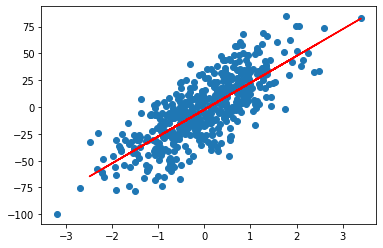

In [165]:
plt.scatter(x,y)
plt.plot(x_test,prediction,c='red')